In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import pickle
import operator
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
from scipy import stats
import commonFunctions as cf
import csv,os

In [2]:
# pjm Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee,
# Virginia, West Virginia, and the District of Columbia
# carbA=[6,41,53]
# carbB=[9,10,23,24,25,34,36,42,44,50,11]
# noState = ['"Guam"','"Puerto Rico"','"Hawaii"','"Virgin Islands"','"Alaska"','"Country Of Mexico"']
# nonCarb = [i for i in stateCodes if i not in carbA+carbB and stateCodes[i] not in noState]

pmj = [10,17,18,21,24,26,34,37,39,42,47,51,54,11]
pmj_carb = [10,24,34,42]
pmj_noncarb = [17, 18, 21, 26, 37, 39, 47, 51, 54]

stateCodes=pickle.load(open("stateCode.pickle","rb"))  

def setplot(plt,ax):

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt,ax

def cohens_d(c0,c1):
    return (np.mean(c0) - np.mean(c1)) / (np.sqrt((np.std(c0) ** 2 + np.std(c1) ** 2) / 2))


In [3]:
o3File='D://Archived/Cancer/Data/PMJ_Ozone'
tempFile='D://Archived/Cancer/Data/PMJ'
syear=1998
eyear=2017

In [4]:
# Ozone data from PMJ region
data = OrderedDict()
for year in range(syear,eyear+1):    
    temp = []
    o3List=os.listdir(o3File+"/{}".format(year))
    for county in o3List:
        if int(county.split('-')[0]) in pmj:        
            o3Data=pickle.load(open('{}/{}/{}'.format(o3File,year,county),'rb'))
            temp.append(o3Data)
    temp_t = list(map(list,zip(*temp)))
    for x_list in range(len(temp_t)):
        filter_list = [float(i) for i in temp_t[x_list] if i!='-']
        if len(filter_list)==0:
            filter_list = [np.nan]
        temp_t[x_list] = (np.mean(filter_list),np.max(filter_list))
    data[year] = temp_t
    

In [5]:
variableFile=tempFile
variable='PMJ'
    
corrData=OrderedDict()
for year in range(syear,eyear+1):    
    o3Data_mean = [i[0] for i in data[year]]
    o3Data_max = [i[1] for i in data[year]]
    variableData=pickle.load(open('{}/{}/load.pickle'.format(variableFile,year),'rb'))
    corr1,length1=cf.correlation(o3Data_mean,variableData,gaps=True)
    #d1 = cohens_d(o3Data_mean,variableData)
    corr2,length2=cf.correlation(o3Data_max,variableData,gaps=True)
    #d2 = cohens_d(o3Data_max,variableData)
    print(year,corr1,corr2)
    #print(d1,d2)
    if length1 < 100:
        corr1 = np.nan
    if length2 < 100:
        corr2 = np.nan
    
    corrData[year]=(corr1,corr2)  

1998 0.386854623067 0.499371071234
1999 0.23664553163 0.323933812935
2000 0.0 0.0
2001 0.236104152077 0.364837117598
2002 0.462035379825 0.597298088445
2003 0.0 0.0
2004 -0.341198531724 0.0
2005 0.22249703343 0.415699205596
2006 0.26501583009 0.409030148058
2007 0.0 0.239515319139
2008 0.0 0.170459265299
2009 -0.138416891155 0.0
2010 0.0 0.182645014998
2011 0.305933991318 0.463154778163
2012 0.299883773361 0.45108562277
2013 0.0 0.0
2014 -0.189706554148 -0.142156002786
2015 0.0 0.145817884252
2016 0.0 0.206449369809
2017 0.0 0.148890640817


In [6]:
corrList = [list(corrData[i]) for i in corrData]

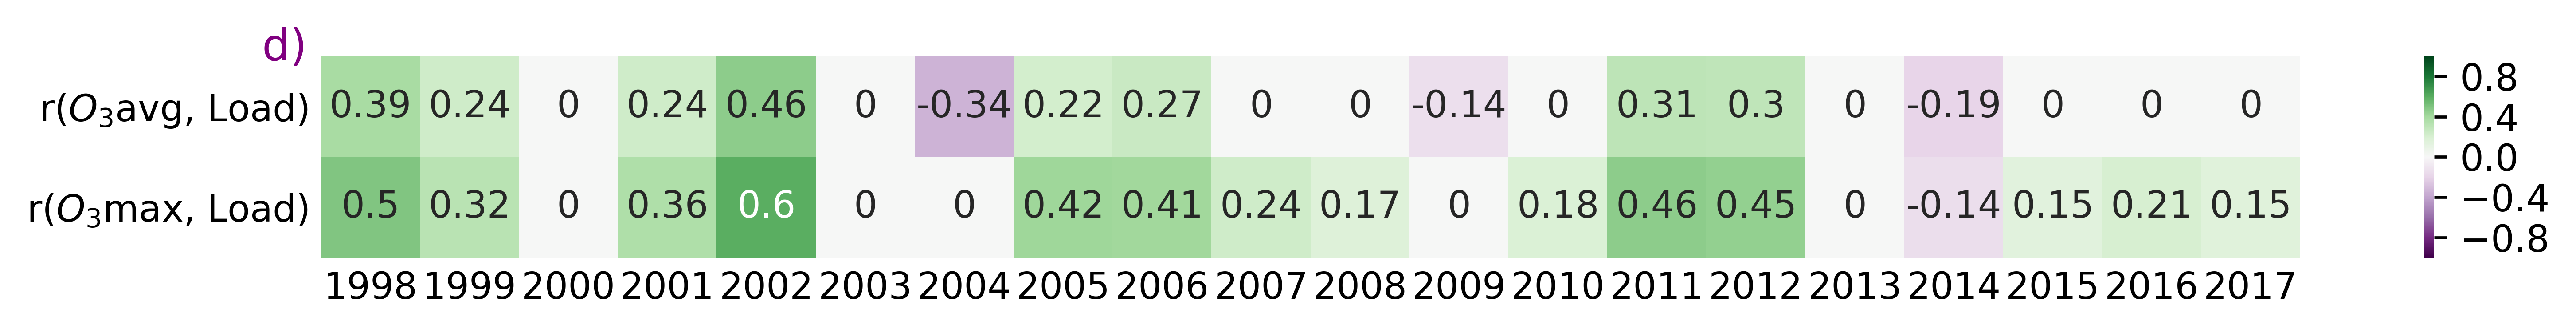

In [7]:
plt.close()
fig,ax = plt.subplots(figsize=(12,1),dpi=600)
plt,ax=setplot(plt,ax)
ax.text(-0.03, 0.98, 'd)', transform=ax.transAxes, size=12,color='purple')

ax.tick_params(axis=u'both', which=u'both',length=0)

corrList_tp = list(map(list,zip(*corrList)))
sns.heatmap(corrList_tp,cmap=plt.get_cmap('PRGn'),vmin=-1,vmax=1,annot=True)
plt.yticks([0.5,1.5],['r($O_{3}$avg, Load)','r($O_{3}$max, Load)'],rotation = 0)
plt.xticks(list(map(lambda x:x+0.5,range(len(corrList)))),[i for i in corrData])
plt.savefig('Com/images/energy.png',dpi=600,bbox_inches='tight')
plt.show()